In [1]:
from src.Generator import Generator
from src.Discriminator import Discriminator
from src.utils.tools import * 
from src.data.GenLoaders import *
from src.training.trainer import *
import torch
torch.manual_seed(0); # Set for testing purposes, please do not change!

Dataset desbalanceado

In [2]:
train_loader,val_loader=get_training_loaders(batch_size=64,file_name="stamp_dataset_only_images_63.pkl",label_as_strings=True)
labels = train_loader.dataset.labels.to(torch.int)
torch.bincount(labels)

tensor([14542,  1396, 14523,  9599, 10534])

Epoch 1/1


c:\Users\nfier\anaconda3\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Iteration 0 - Batch 0/791 - Train loss: 1.6006454229354858, Train acc: 0.25
Iteration 100 - Batch 100/791 - Train loss: 1.4005619901241642, Train acc: 0.5883353960396039
Iteration 200 - Batch 200/791 - Train loss: 1.3221877914163012, Train acc: 0.6393034825870647
Iteration 300 - Batch 300/791 - Train loss: 1.275545787573653, Train acc: 0.6723941029900332
Iteration 400 - Batch 400/791 - Train loss: 1.241852703237177, Train acc: 0.6970854114713217
Iteration 500 - Batch 500/791 - Train loss: 1.2198542527809828, Train acc: 0.7138535429141717
Iteration 600 - Batch 600/791 - Train loss: 1.2032939354314185, Train acc: 0.7261855241264559
Iteration 700 - Batch 700/791 - Train loss: 1.190691704416751, Train acc: 0.7355117689015692
Val loss: 1.2334638983011246, Val acc: 0.666
Tiempo total de entrenamiento: 44.5656 [s]


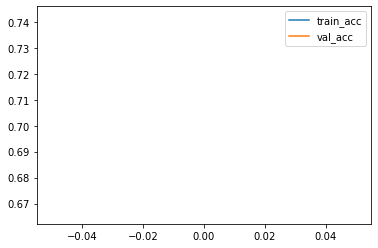

In [3]:
curves=trainer(train_loader,val_loader,epochs=1)

Generación de datos

In [4]:
device = 'cuda'
z_dim = 64
num_img=1000

gen_1 = Generator(z_dim).to(device)
gen_1.load_state_dict(torch.load('dcgan'))
gen = Generator(z_dim).to(device)
gen.load_state_dict(torch.load('wgangp'))
fake_noise = get_noise(num_img, z_dim, device=device)
fake_1 = gen_1(fake_noise)
fake= gen(fake_noise)

In [14]:
train_loader,val_loader=get_training_loaders(synthetic_SN=fake.to('cpu'),batch_size=64,file_name="stamp_dataset_only_images_63.pkl",label_as_strings=True)
torch.bincount(train_loader.dataset.labels.to(torch.int))

tensor([14542,  1397, 14523,  9599, 10534])

In [15]:
curves=trainer(train_loader,val_loader,epochs=2)

Epoch 1/2


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.